In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler
# from tqdm import tqdm
# from sklearn.neural_network import MLPClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from xgboost import XGBClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, roc_auc_score, confusion_matrix, classification_report, roc_curve, auc
from sklearn.multiclass import OneVsRestClassifier
from sklearn.preprocessing import label_binarize
from google.colab import drive
from keras.models import Sequential
from keras.layers import Dense, Conv1D, MaxPooling1D, Flatten

In [ ]:
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
file_path = '/content/drive/MyDrive/Theft Data.csv'
df = pd.read_csv(file_path)
df.head(10)

,0,Electricity:Facility [kW](Hourly),Fans:Electricity [kW](Hourly),Cooling:Electricity [kW](Hourly),Heating:Electricity [kW](Hourly),InteriorLights:Electricity [kW](Hourly),InteriorEquipment:Electricity [kW](Hourly),Gas:Facility [kW](Hourly),Heating:Gas [kW](Hourly),InteriorEquipment:Gas [kW](Hourly),Water Heater:WaterSystems:Gas [kW](Hourly),Class,theft
0,0,22.035977,3.586221,0.000000,0.0,4.589925,8.1892,136.585903,123.999076,3.33988,9.246947,FullServiceRestaurant,Normal
1,1,14.649757,0.000000,0.000000,0.0,1.529975,7.4902,3.359880,0.000000,3.33988,0.020000,FullServiceRestaurant,Normal
2,2,14.669567,0.000000,0.000000,0.0,1.529975,7.4902,3.359880,0.000000,3.33988,0.020000,FullServiceRestaurant,Normal
3,3,14.677808,0.000000,0.000000,0.0,1.529975,7.4902,3.931932,0.000000,3.33988,0.592052,FullServiceRestaurant,Normal
4,4,14.824794,0.000000,0.000000,0.0,1.529975,7.4902,3.359880,0.000000,3.33988,0.020000,FullServiceRestaurant,Normal
5,5,22.182649,3.586221,0.013197,0.0,4.589925,8.1892,130.564942,121.623185,8.34970,0.592057,FullServiceRestaurant,Normal
6,6,38.131845,3.586221,0.007371,0.0,9.179851,19.4245,140.435454,117.967915,16.69940,5.768139,FullServiceRestaurant,Normal
7,7,45.597278,3.586221,0.007450,0.0,9.179851,26.9147,135.456017,105.213458,25.04910,5.193459,FullServiceRestaurant,Normal
8,8,45.603647,3.586221,0.000000,0.0,9.179851,26.9147,145.575077,106.407810,33.39880,5.768467,FullServiceRestaurant,Normal
9,9,38.113761,3.586221,0.000000,0.0,9.179851,19.4245,147.695901,116.879014,25.04910,5.767787,FullServiceRestaurant,Normal


In [ ]:
X = df.iloc[:, 1:11]  # Features
y = df['theft']  # Target variable
label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(y)

CNN

In [ ]:
# label_encoder = LabelEncoder()
# y_encoded = label_encoder.fit_transform(y)

# # Split the dataset into training and testing sets
# X_train, X_test, y_train, y_test = train_test_split(X, y_encoded, test_size=0.25, random_state=42)

# # Reshape the data for 1D CNN
# X_train = np.expand_dims(X_train, axis=2)
# X_test = np.expand_dims(X_test, axis=2)

# # Designing the CNN model
# model = Sequential()
# model.add(Conv1D(32, 3, activation='relu', input_shape=(10, 1)))
# model.add(MaxPooling1D(2))
# model.add(Conv1D(64, 3, activation='relu'))
# model.add(MaxPooling1D(2))
# model.add(Flatten())
# model.add(Dense(64, activation='relu'))
# model.add(Dense(7, activation='softmax'))

# # Compile the model
# model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# # Train the model
# history = model.fit(X_train, y_train, epochs=10, batch_size=32, validation_split=0.2)

# # Predictions
# y_pred = np.argmax(model.predict(X_test), axis=-1)

# # Evaluation
# conf_matrix = confusion_matrix(y_test, y_pred)
# plt.figure(figsize=(8, 6))
# sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=label_encoder.classes_, yticklabels=label_encoder.classes_)
# plt.xlabel('Predicted Label')
# plt.ylabel('True Label')
# plt.title('Confusion Matrix (CNN)')
# plt.show()

# print("\nClassification Report: (CNN)\n", classification_report(y_test, y_pred))

In [ ]:
# X_train, X_test, y_train, y_test = train_test_split(X, y_encoded, test_size=0.2, random_state=42)

# # Reshape the data for 1D CNN
# X_train = np.expand_dims(X_train, axis=2)
# X_test = np.expand_dims(X_test, axis=2)

# # Designing the CNN model
# model = Sequential()
# model.add(Conv1D(32, 3, activation='relu', input_shape=(10, 1)))
# model.add(MaxPooling1D(2))
# model.add(Conv1D(64, 3, activation='relu'))
# model.add(MaxPooling1D(2))
# model.add(Flatten())
# model.add(Dense(64, activation='relu'))
# model.add(Dense(7, activation='softmax'))

# # Compile the model
# model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# # Train the model
# history = model.fit(X_train, y_train, epochs=10, batch_size=32, validation_split=0.2)

# # Predictions
# y_pred = np.argmax(model.predict(X_test), axis=-1)

# # Evaluation
# conf_matrix = confusion_matrix(y_test, y_pred)
# plt.figure(figsize=(8, 6))
# sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=label_encoder.classes_, yticklabels=label_encoder.classes_)
# plt.xlabel('Predicted Label')
# plt.ylabel('True Label')
# plt.title('Confusion Matrix (CNN)')
# plt.show()

# print("\nClassification Report: (CNN)\n", classification_report(y_test, y_pred))

Epoch 1/20
2804/2804 [==============================] - 22s 7ms/step - loss: 1.1138 - accuracy: 0.6543 - val_loss: 0.9173 - val_accuracy: 0.6919
Epoch 2/20
2804/2804 [==============================] - 19s 7ms/step - loss: 0.8462 - accuracy: 0.7118 - val_loss: 0.7893 - val_accuracy: 0.7337
Epoch 3/20
2804/2804 [==============================] - 21s 8ms/step - loss: 0.7574 - accuracy: 0.7389 - val_loss: 0.7251 - val_accuracy: 0.7493
Epoch 4/20
2804/2804 [==============================] - 20s 7ms/step - loss: 0.6994 - accuracy: 0.7567 - val_loss: 0.6812 - val_accuracy: 0.7623
Epoch 5/20
2804/2804 [==============================] - 19s 7ms/step - loss: 0.6577 - accuracy: 0.7710 - val_loss: 0.6252 - val_accuracy: 0.7820
Epoch 6/20
2804/2804 [==============================] - 20s 7ms/step - loss: 0.6298 - accuracy: 0.7794 - val_loss: 0.6201 - val_accuracy: 0.7807
Epoch 7/20
2804/2804 [==============================] - 19s 7ms/step - loss: 0.6096 - accuracy: 0.7857 - val_loss: 0.6005 - val_ac

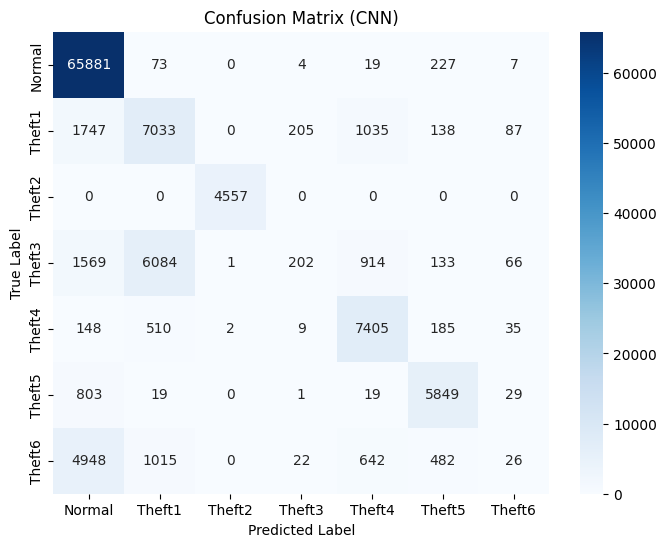


Classification Report: (CNN)
               precision    recall  f1-score   support

           0       0.88      1.00      0.93     66211
           1       0.48      0.69      0.56     10245
           2       1.00      1.00      1.00      4557
           3       0.46      0.02      0.04      8969
           4       0.74      0.89      0.81      8294
           5       0.83      0.87      0.85      6720
           6       0.10      0.00      0.01      7135

    accuracy                           0.81    112131
   macro avg       0.64      0.64      0.60    112131
weighted avg       0.75      0.81      0.76    112131



In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y_encoded, test_size=0.2, random_state=42)
X_train = np.expand_dims(X_train, axis=2)
X_test = np.expand_dims(X_test, axis=2)

model = Sequential()
model.add(Conv1D(32, 3, activation='relu', input_shape=(10, 1)))
model.add(MaxPooling1D(2))
model.add(Conv1D(64, 3, activation='relu'))
model.add(MaxPooling1D(2))
model.add(Flatten())
model.add(Dense(64, activation='relu'))
model.add(Dense(7, activation='softmax'))

model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
history = model.fit(X_train, y_train, epochs=20, batch_size=128, validation_split=0.2)
y_pred = np.argmax(model.predict(X_test), axis=-1)

conf_matrix = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=label_encoder.classes_, yticklabels=label_encoder.classes_)
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix (CNN)')
plt.show()

print("\nClassification Report: (CNN)\n", classification_report(y_test, y_pred))

RNN

In [ ]:
from keras.layers import SimpleRNN, Dense

In [ ]:
# X_train, X_test, y_train, y_test = train_test_split(X, y_encoded, test_size=0.25, random_state=42)

# # Designing the RNN model
# model = Sequential()
# model.add(SimpleRNN(64, input_shape=(X_train.shape[1], 1), activation='relu'))
# model.add(Dense(32, activation='relu'))
# model.add(Dense(7, activation='softmax'))

# # Compile the model
# model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# # Train the model
# history = model.fit(X_train, y_train, epochs=10, batch_size=32, validation_split=0.2)

# # Predictions
# y_pred_probs = model.predict(X_test)
# y_pred = np.argmax(y_pred_probs, axis=1)

# # Evaluation
# conf_matrix = confusion_matrix(y_test, y_pred)
# plt.figure(figsize=(8, 6))
# sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=label_encoder.classes_, yticklabels=label_encoder.classes_)
# plt.xlabel('Predicted Label')
# plt.ylabel('True Label')
# plt.title('Confusion Matrix (RNN)')
# plt.show()

# print("\nClassification Report: (RNN)\n", classification_report(y_test, y_pred))

In [ ]:
# X_train, X_test, y_train, y_test = train_test_split(X, y_encoded, test_size=0.2, random_state=42)

# # Designing the RNN model
# model = Sequential()
# model.add(SimpleRNN(64, input_shape=(X_train.shape[1], 1), activation='relu'))
# model.add(Dense(32, activation='relu'))
# model.add(Dense(7, activation='softmax'))

# # Compile the model
# model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# # Train the model
# history = model.fit(X_train, y_train, epochs=10, batch_size=32, validation_split=0.2)

# # Predictions
# y_pred_probs = model.predict(X_test)
# y_pred = np.argmax(y_pred_probs, axis=1)

# # Evaluation
# conf_matrix = confusion_matrix(y_test, y_pred)
# plt.figure(figsize=(8, 6))
# sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=label_encoder.classes_, yticklabels=label_encoder.classes_)
# plt.xlabel('Predicted Label')
# plt.ylabel('True Label')
# plt.title('Confusion Matrix (RNN)')
# plt.show()

# print("\nClassification Report: (RNN)\n", classification_report(y_test, y_pred))

Epoch 1/20
2804/2804 [==============================] - 16s 5ms/step - loss: 1.0583 - accuracy: 0.6635 - val_loss: 0.8875 - val_accuracy: 0.7068
Epoch 2/20
2804/2804 [==============================] - 14s 5ms/step - loss: 0.8185 - accuracy: 0.7222 - val_loss: 0.7666 - val_accuracy: 0.7406
Epoch 3/20
2804/2804 [==============================] - 14s 5ms/step - loss: 0.7282 - accuracy: 0.7489 - val_loss: 0.7394 - val_accuracy: 0.7500
Epoch 4/20
2804/2804 [==============================] - 15s 5ms/step - loss: 0.6767 - accuracy: 0.7639 - val_loss: 0.6788 - val_accuracy: 0.7597
Epoch 5/20
2804/2804 [==============================] - 15s 5ms/step - loss: 0.6373 - accuracy: 0.7767 - val_loss: 0.6212 - val_accuracy: 0.7829
Epoch 6/20
2804/2804 [==============================] - 15s 5ms/step - loss: 0.6094 - accuracy: 0.7856 - val_loss: 0.5915 - val_accuracy: 0.7929
Epoch 7/20
2804/2804 [==============================] - 14s 5ms/step - loss: 0.5900 - accuracy: 0.7915 - val_loss: 0.5769 - val_ac

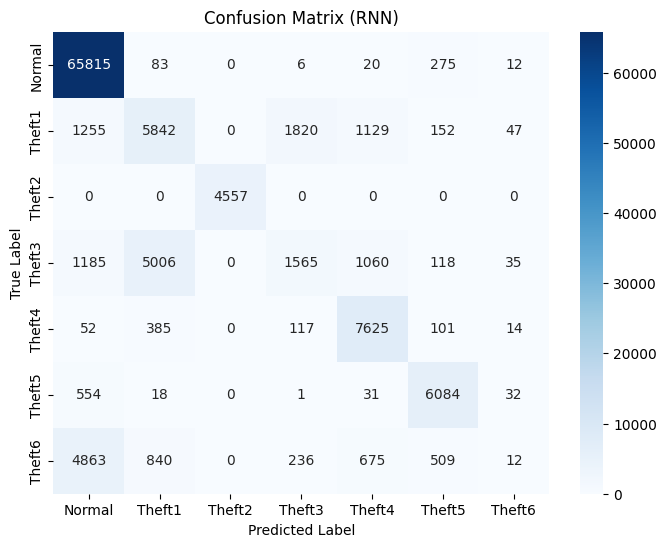


Classification Report: (RNN)
               precision    recall  f1-score   support

           0       0.89      0.99      0.94     66211
           1       0.48      0.57      0.52     10245
           2       1.00      1.00      1.00      4557
           3       0.42      0.17      0.25      8969
           4       0.72      0.92      0.81      8294
           5       0.84      0.91      0.87      6720
           6       0.08      0.00      0.00      7135

    accuracy                           0.82    112131
   macro avg       0.63      0.65      0.63    112131
weighted avg       0.75      0.82      0.78    112131



In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y_encoded, test_size=0.2, random_state=42)
model = Sequential()
model.add(SimpleRNN(64, input_shape=(X_train.shape[1], 1), activation='relu'))
model.add(Dense(32, activation='relu'))
model.add(Dense(7, activation='softmax'))

model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
history = model.fit(X_train, y_train, epochs=20, batch_size=128, validation_split=0.2)

y_pred_probs = model.predict(X_test)
y_pred = np.argmax(y_pred_probs, axis=1)

conf_matrix = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=label_encoder.classes_, yticklabels=label_encoder.classes_)
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix (RNN)')
plt.show()

print("\nClassification Report: (RNN)\n", classification_report(y_test, y_pred))

ANN

Epoch 1/10
10513/10513 [==============================] - 29s 3ms/step - loss: 1.3176 - accuracy: 0.6390 - val_loss: 0.9622 - val_accuracy: 0.6857
Epoch 2/10
10513/10513 [==============================] - 28s 3ms/step - loss: 0.8534 - accuracy: 0.7126 - val_loss: 0.7555 - val_accuracy: 0.7389
Epoch 3/10
10513/10513 [==============================] - 27s 3ms/step - loss: 0.6730 - accuracy: 0.7693 - val_loss: 0.6479 - val_accuracy: 0.7796
Epoch 5/10
10513/10513 [==============================] - 28s 3ms/step - loss: 0.6401 - accuracy: 0.7814 - val_loss: 0.6307 - val_accuracy: 0.7875
Epoch 6/10
10513/10513 [==============================] - 29s 3ms/step - loss: 0.6214 - accuracy: 0.7882 - val_loss: 0.6325 - val_accuracy: 0.7847
Epoch 7/10
10513/10513 [==============================] - 28s 3ms/step - loss: 0.6052 - accuracy: 0.7932 - val_loss: 0.6173 - val_accuracy: 0.7944
Epoch 8/10
10513/10513 [==============================] - 26s 3ms/step - loss: 0.5943 - accuracy: 0.7967 - val_loss: 0

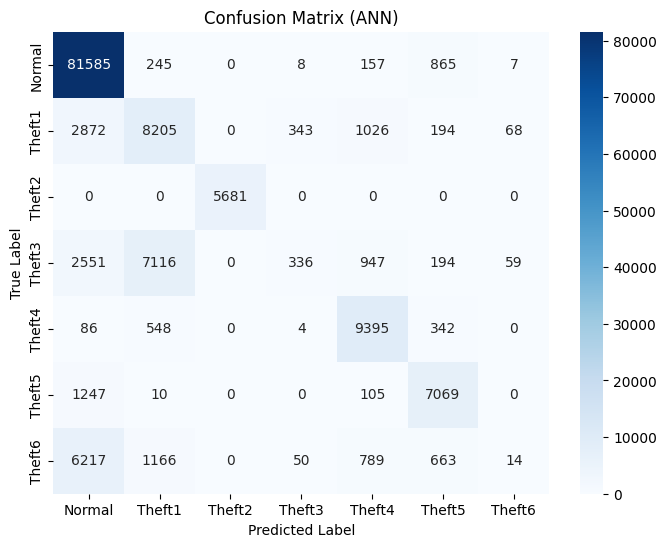


Classification Report: (ANN)
               precision    recall  f1-score   support

           0       0.86      0.98      0.92     82867
           1       0.47      0.65      0.55     12708
           2       1.00      1.00      1.00      5681
           3       0.45      0.03      0.06     11203
           4       0.76      0.91      0.82     10375
           5       0.76      0.84      0.80      8431
           6       0.09      0.00      0.00      8899

    accuracy                           0.80    140164
   macro avg       0.63      0.63      0.59    140164
weighted avg       0.74      0.80      0.75    140164



In [ ]:
label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(y)

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y_encoded, test_size=0.25, random_state=42)


# Designing the ANN model
model = Sequential()
model.add(Dense(64, input_dim=10, activation='relu'))
model.add(Dense(32, activation='relu'))
model.add(Dense(7, activation='softmax'))

# Compile the model
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Train the model
history = model.fit(X_train, y_train, epochs=10, batch_size=32, validation_split=0.2)

# Predictions
y_pred_probs = model.predict(X_test)
y_pred = np.argmax(y_pred_probs, axis=1)

# Evaluation
conf_matrix = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=label_encoder.classes_, yticklabels=label_encoder.classes_)
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix (ANN)')
plt.show()

print("\nClassification Report: (ANN)\n", classification_report(y_test, y_pred))

Epoch 1/20
8971/8971 [==============================] - 26s 3ms/step - loss: 1.2952 - accuracy: 0.6401 - val_loss: 0.9557 - val_accuracy: 0.6905
Epoch 2/20
8971/8971 [==============================] - 23s 3ms/step - loss: 0.8455 - accuracy: 0.7121 - val_loss: 0.7806 - val_accuracy: 0.7352
Epoch 3/20
8971/8971 [==============================] - 25s 3ms/step - loss: 0.7287 - accuracy: 0.7517 - val_loss: 0.6793 - val_accuracy: 0.7720
Epoch 4/20
8971/8971 [==============================] - 24s 3ms/step - loss: 0.6706 - accuracy: 0.7722 - val_loss: 0.6617 - val_accuracy: 0.7734
Epoch 5/20
8971/8971 [==============================] - 23s 3ms/step - loss: 0.6389 - accuracy: 0.7818 - val_loss: 0.6191 - val_accuracy: 0.7862
Epoch 6/20
8971/8971 [==============================] - 25s 3ms/step - loss: 0.6186 - accuracy: 0.7881 - val_loss: 0.6231 - val_accuracy: 0.7871
Epoch 7/20
8971/8971 [==============================] - 21s 2ms/step - loss: 0.5955 - accuracy: 0.7969 - val_loss: 0.5935 - val_ac

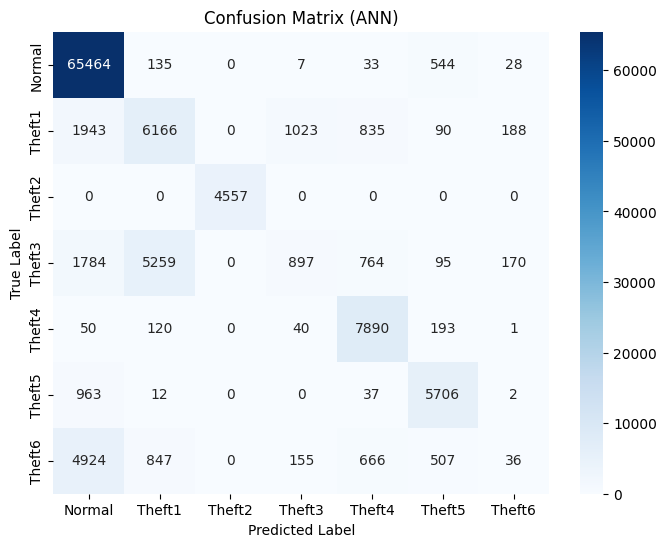


Classification Report: (ANN)
               precision    recall  f1-score   support

           0       0.87      0.99      0.93     66211
           1       0.49      0.60      0.54     10245
           2       1.00      1.00      1.00      4557
           3       0.42      0.10      0.16      8969
           4       0.77      0.95      0.85      8294
           5       0.80      0.85      0.82      6720
           6       0.08      0.01      0.01      7135

    accuracy                           0.81    112131
   macro avg       0.63      0.64      0.62    112131
weighted avg       0.74      0.81      0.76    112131



In [ ]:
label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(y)

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y_encoded, test_size=0.2, random_state=42)

# Designing the ANN model
model = Sequential()
model.add(Dense(64, input_dim=10, activation='relu'))
model.add(Dense(32, activation='relu'))
model.add(Dense(7, activation='softmax'))

# Compile the model
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Train the model
history = model.fit(X_train, y_train, epochs=20, batch_size=40, validation_split=0.2)

# Predictions
y_pred_probs = model.predict(X_test)
y_pred = np.argmax(y_pred_probs, axis=1)

# Evaluation
conf_matrix = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=label_encoder.classes_, yticklabels=label_encoder.classes_)
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix (ANN)')
plt.show()

print("\nClassification Report: (ANN)\n", classification_report(y_test, y_pred))